# Applied Machine Learning- Part 2: Supervised learning Classification
## Binary and Multi-class Classification

## Logistic Regression
### Breast cancer sample

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.5)

clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print('Accuracy of logistic regression classifier on: training set = {:.2f}, test set = {:.2f}'
      .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on: training set = 0.96, test set = 0.95


#### Linear classifier with the maximum margin is the best linear classifier that called linear support vector machine (LSVM).

## Support Vector Machines
### Linear support vector machine

In [4]:
from sklearn.svm import SVC

In [5]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
print('Accuracy of support vector classifier on: training set = {:.2f}, test set = {:.2f}'
      .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Accuracy of support vector classifier on: training set = 0.97, test set = 0.96


#### Larger C: fit the training data as well as possible - Less regularization

In [6]:
from sklearn.svm import LinearSVC

In [7]:
clf = LinearSVC(C=0.1).fit(X_train, y_train)
clf.score(X_test, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8526315789473684

## Multi-class Classification
### Kernelized Support Vector Machines

#### SVC default is RBF kernel, the other kernel can use is polynomial. RBF gamma vector if small: more points group with each other and have smoother boundary. High value of gamma can cause overfitting.

In [8]:
clf = SVC(C=10).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on: train = {:.2f}, test = {:.2f}'
     .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Accuracy of RBF-kernel SVC on: train = 0.93, test = 0.91


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Accuracy of RBF-kernel SVC on normalized features: train = {:.2f}, test = {:.2f}'
     .format(clf.score(X_train_scaled, y_train), clf.score(X_test_scaled, y_test)))

Accuracy of RBF-kernel SVC on normalized features: train = 0.99, test = 0.97


#### So, normalization is pretty well in this scenario!

### Cross validation

In [11]:
df = pd.read_csv('fruit_data_with_colours.csv')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [12]:
X = df[['width', 'height']]
y = df['fruit_label']

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [14]:
clf = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(clf, X, y)          # default is cv=5 (number of folds)
print('Cross-validation scores (5-fold):',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.75       0.75       0.83333333 0.83333333 0.81818182]
Mean cross-validation score (5-fold): 0.797


#### Four levels of gamma and 5 cross-validation folds

In [15]:
from sklearn.model_selection import validation_curve

In [16]:
param_range = np.logspace(-3, 3, 4)      # gamma = 0.001, 0.1, 10, 1000
train_scores, test_scores = validation_curve(SVC(), X, y, param_name='gamma', param_range=param_range, cv=5)
train_scores               # Train scores with increasing gamma increased. Test scores first increased and then decreased.

array([[0.46808511, 0.40425532, 0.40425532, 0.34042553, 0.33333333],
       [0.82978723, 0.78723404, 0.76595745, 0.74468085, 0.75      ],
       [0.87234043, 0.89361702, 0.89361702, 0.89361702, 0.85416667],
       [0.9787234 , 1.        , 0.9787234 , 1.        , 0.97916667]])

#### Using validation curve for see how the model sensitive according to its parameters.

### Tip: Cross-validation is for evaluate the model, and Gridsearch is for tune the model.

## Decision Trees

In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from myplt import plot_feature_importances

In [18]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=3)
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision tree classifier: train = {:.2f}, test = {:.2f}'
      .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Accuracy of Decision tree classifier: train = 1.00, test = 0.97


#### Controlling the model complexity of decision trees is needed to prevent overfitting. it can be done with max_depth.

In [19]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision tree classifier: train = {:.2f}, test = {:.2f}'
      .format(clf2.score(X_train, y_train), clf2.score(X_test, y_test)))

Accuracy of Decision tree classifier: train = 0.98, test = 0.97


#### Decision trees clf parameteres: max_depth: number of split points - use for reduce tree complexity and overfitting.                        min_samples_leaf: minimum number of instances a leaf can have - to avoid further splitting                                                                      max_leaf_nodes: limits total number of leaves in the tree.      Adjust just one of these enough for avoid to overfitting.

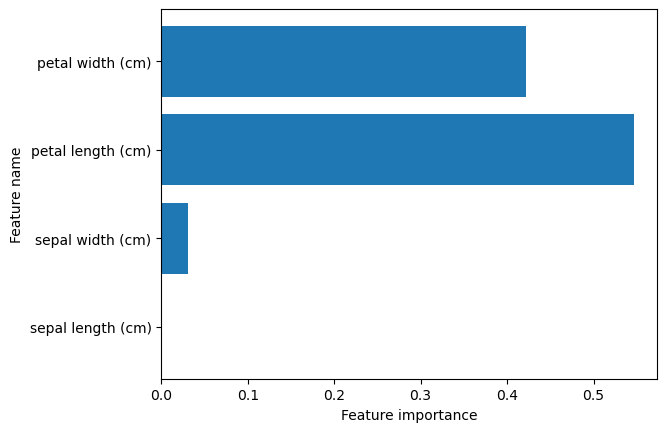

Feature importances: [0.         0.03128242 0.54643762 0.42227996]


In [27]:
plt.figure()
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))